# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     832.1
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           4.56e-40
Time:                        15:38:00   Log-Likelihood:               -0.96217
No. Observations:                  50   AIC:                             9.924
Df Residuals:                      46   BIC:                             17.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9882      0.088     56.907      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.46903957  4.92118249  5.33910048  5.69997391  5.98921867  6.20288223
  6.34829306  6.44285659  6.51119553  6.58110445  6.67898317  6.82549941
  7.03219306  7.29958029  7.61706868  7.96469757  8.31641752  8.64437014
  8.92346519  9.1355028   9.27216367  9.3363759   9.34183394  9.31074856
  9.27019779  9.24767796  9.26658624  9.34237646  9.48002015  9.6731897
  9.90529798 10.15222357 10.38627381 10.58073465 10.7142597  10.77437734
 10.75953984 10.67937756 10.5531168  10.4064209  10.26717388 10.16089913
 10.10656603 10.11347328 10.17972123 10.29252391 10.43030977 10.5662658
 10.67274288 10.72579839]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.69493519 10.55149801 10.31190728 10.01358306  9.70578336  9.43754399
  9.24567293  9.14573844  9.12825742  9.16101716]


## Plot comparison

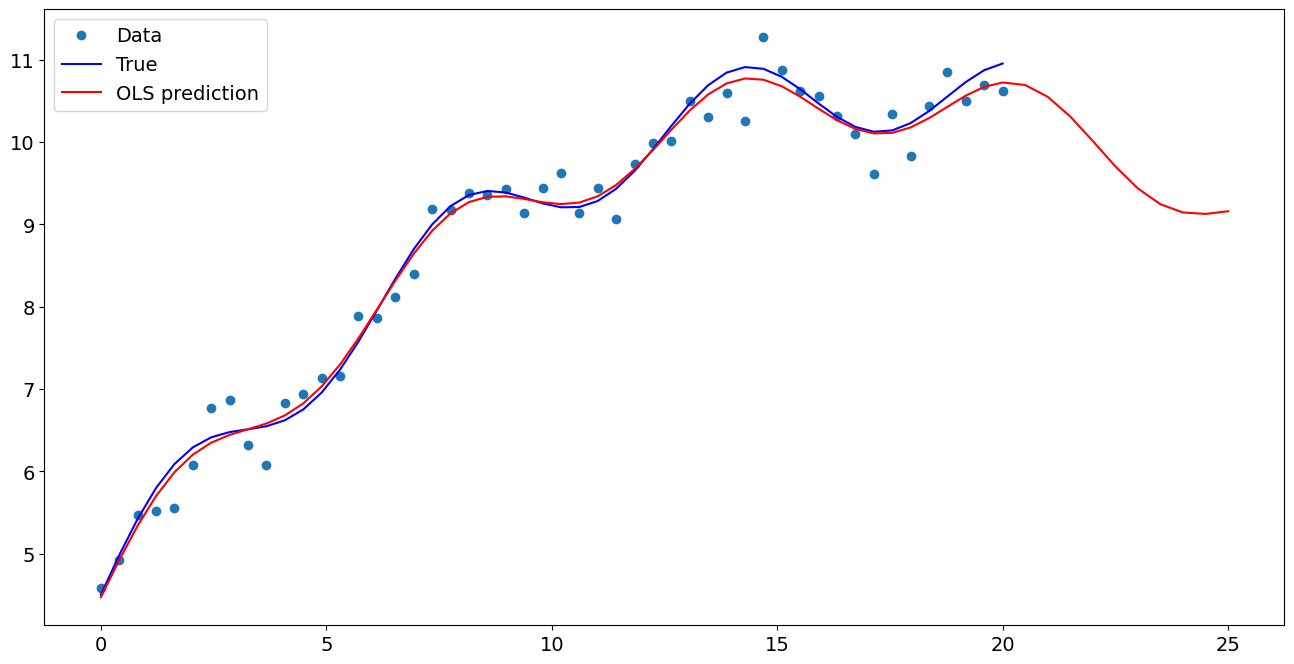

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.988184
x1                  0.501383
np.sin(x1)          0.418715
I((x1 - 5) ** 2)   -0.020766
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.694935
1    10.551498
2    10.311907
3    10.013583
4     9.705783
5     9.437544
6     9.245673
7     9.145738
8     9.128257
9     9.161017
dtype: float64